#### Importes

In [541]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest

### Comprensión empresarial

Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

Descripción del problema

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.

## PASO 1 : Planteamos nuestro problema o nuestro target a investigar


#### ¿Que cliente contratará o no un depósito a largo plazo?

## PASO 2: Recopilacion de datos

In [542]:
df = pd.read_csv("/workspaces/machine-learning-elius123ef/data/raw/bank-marketing-campaign-data.csv", sep=";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- age. Edad del cliente (numérico)

- job. Tipo de trabajo (categórico)

- marital. Estado civil (categórico)

- education. Nivel de educación (categórico) 

- default. ¿Tiene crédito actualmente? (categórico) / FUERA

- housing. ¿Tiene un préstamo de vivienda? (categórico)

- loan. ¿Tiene un préstamo personal? (categórico)

- contact. Tipo de comunicación de contacto (categórico) /FUERA

- month. Último mes en el que se le ha contactado (categórico) 

- day_of_week. Último día en el que se le ha contactado (categórico)

- duration. Duración del contacto previo en segundos (numérico) / FUERA

- campaign. Número de contactos realizados durante esta campaña al cliente (numérico) / FUERA

- pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico) / FUERA

- previous. Número de contactos realizados durante la campaña anterior al cliente (numérico) /FUERA

- poutcome. Resultado de la campaña de marketing anterior (categórico) / FUERA

- emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)

- cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)

- cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico) 

- euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico) 

- nr.employed. Número de empleados. Indicador trimestral (numérico) /FUERA 'Necesito datos de los clientes, no de los chambeadores'

- y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico) 


## Paso 3: Análisis Descriptivo

In [544]:
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [545]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


##### Buscamos valores nulos

In [546]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Observamos que no tenemos ningun valor nulo

##### Buscamos duplicados

In [547]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [548]:
df.duplicated().sum()

np.int64(12)

Observamos que tenemos 12 valores repetidos, los cuales procederemos a eliminar

In [549]:
if df.duplicated().sum():
    df = df.drop_duplicates()

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Paso 4: Limpieza de Datos

### Buscamos una correlacion con nuestra variable "y" para saber con que datos tenemos que empezar a trabajar

Factorizamos nuestras variables de tipo "object"

In [550]:
df['number_marital'] = pd.factorize(df['marital'])[0]
df['number_marital'].value_counts()
df['number_education'] = pd.factorize(df['education'])[0]
df['number_education'].value_counts()
df['number_default'] = pd.factorize(df['default'])[0]
df['number_default'].value_counts()
df['number_housing'] = pd.factorize(df['housing'])[0]
df['number_housing'].value_counts()
df['number_loan'] = pd.factorize(df['loan'])[0]
df['number_loan'].value_counts()
df['number_month'] = pd.factorize(df['month'])[0]
df['number_month'].value_counts()
df['number_contact'] = pd.factorize(df['contact'])[0]
df['number_contact'].value_counts()
df['number_day_of_week'] = pd.factorize(df['day_of_week'])[0]
df['number_day_of_week'].value_counts()
df['number_poutcome'] = pd.factorize(df['poutcome'])[0]
df['number_poutcome'].value_counts()
df['number_job'] = pd.factorize(df['job'])[0]
df['number_job'].value_counts()
df['y'] = pd.factorize(df['y'])[0]
df['y'].value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

Obtenemos nuestro df en numericos

In [551]:
df_obj_num = df[["y", 'age', 'number_marital', 'number_education', 'number_default', 'number_housing', 'number_loan', 'number_month', 'number_contact', 'number_day_of_week', 'number_poutcome', 'number_job']]

In [552]:
df_obj_num = df_obj_num

In [553]:
df_numerico = df.select_dtypes(include=['number'])

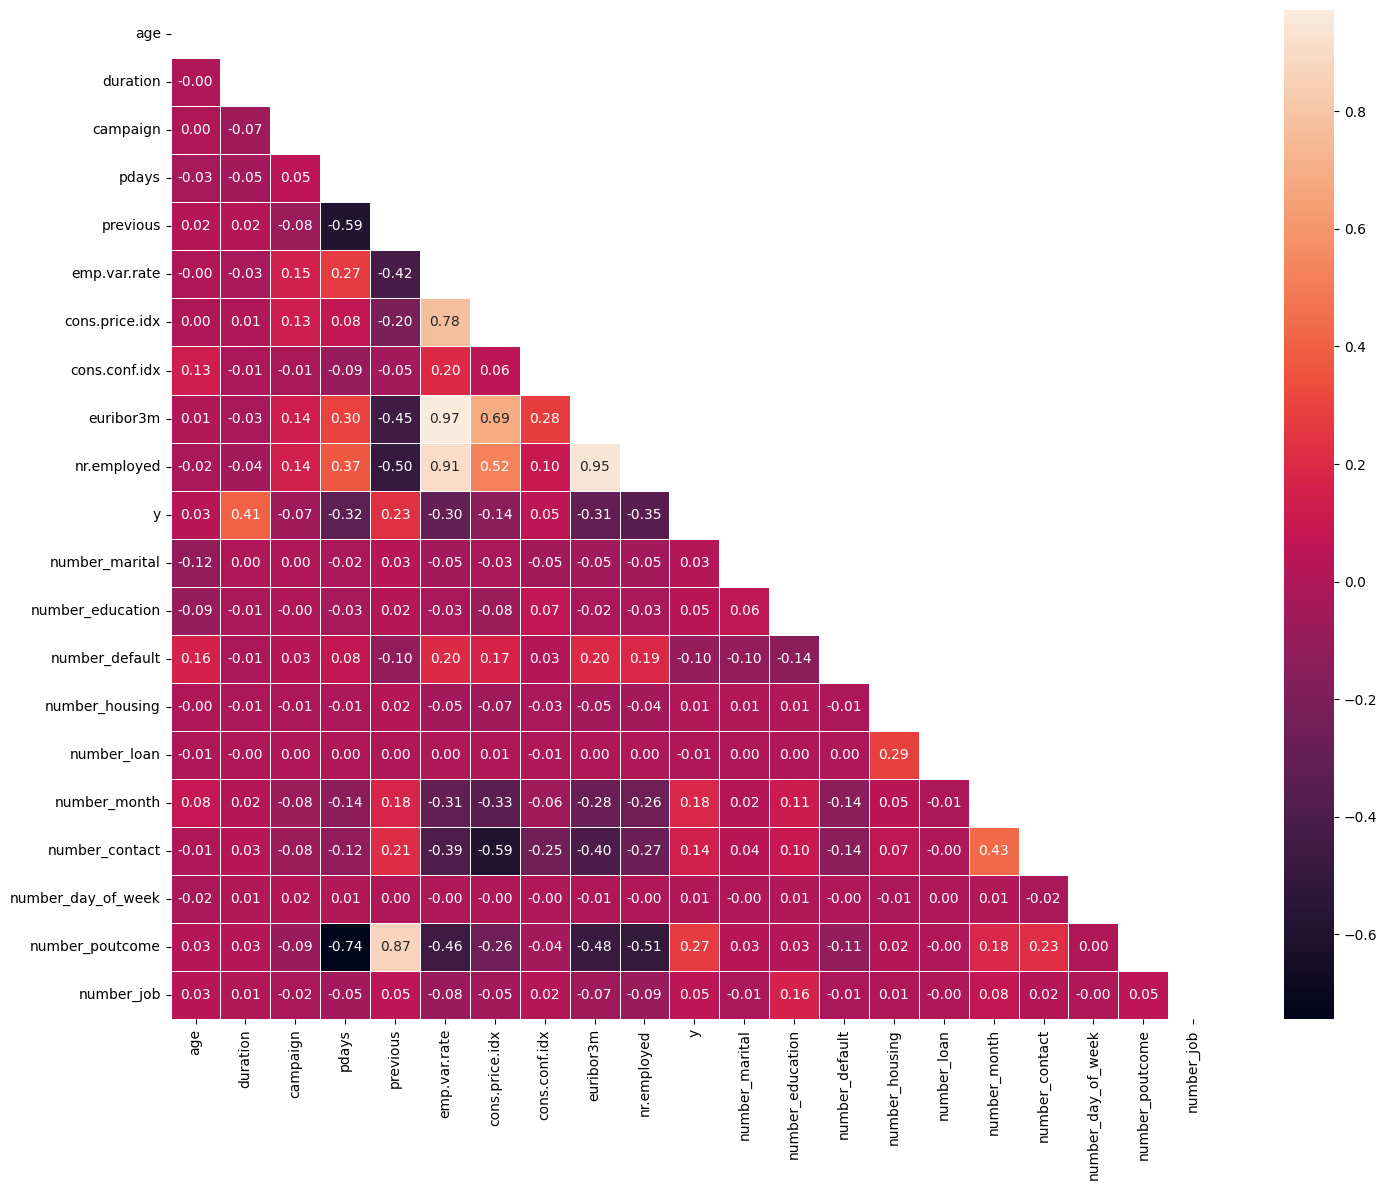

In [554]:
corr = df_numerico.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.00001]
significant_corr
fig, axis = plt.subplots(figsize=(15, 12))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

### Limpieza de datos: Eliminar información irrelevante

- Eliminamos columnas que no nos interesan, o que estan correlacionadas entre si, segun nuestro grafico de correlaciones

In [555]:
df.drop(["number_poutcome", "emp.var.rate", "euribor3m","pdays", "previous", "day_of_week", "number_day_of_week", "nr.employed", "duration",'cons.conf.idx', 'cons.price.idx', 'campaign'], axis=1, inplace=True)
df

,age,job,marital,education,default,housing,loan,contact,month,poutcome,y,number_marital,number_education,number_default,number_housing,number_loan,number_month,number_contact,number_job
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,nonexistent,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,nonexistent,0,0,1,1,0,0,0,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,nonexistent,0,0,1,0,1,0,0,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,nonexistent,0,0,2,0,0,0,0,0,2
4,56,services,married,high.school,no,no,yes,telephone,may,nonexistent,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,nonexistent,1,0,4,0,1,0,5,1,5
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,nonexistent,0,0,4,0,0,0,5,1,3
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,nonexistent,0,0,6,0,1,0,5,1,5
41186,44,technician,married,professional.course,no,no,no,cellular,nov,nonexistent,1,0,4,0,0,0,5,1,4


## Paso 5: Análisis de Variables

In [556]:
df

,age,job,marital,education,default,housing,loan,contact,month,poutcome,y,number_marital,number_education,number_default,number_housing,number_loan,number_month,number_contact,number_job
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,nonexistent,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,nonexistent,0,0,1,1,0,0,0,0,1
2,37,services,married,high.school,no,yes,no,telephone,may,nonexistent,0,0,1,0,1,0,0,0,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,nonexistent,0,0,2,0,0,0,0,0,2
4,56,services,married,high.school,no,no,yes,telephone,may,nonexistent,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,nonexistent,1,0,4,0,1,0,5,1,5
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,nonexistent,0,0,4,0,0,0,5,1,3
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,nonexistent,0,0,6,0,1,0,5,1,5
41186,44,technician,married,professional.course,no,no,no,cellular,nov,nonexistent,1,0,4,0,0,0,5,1,4


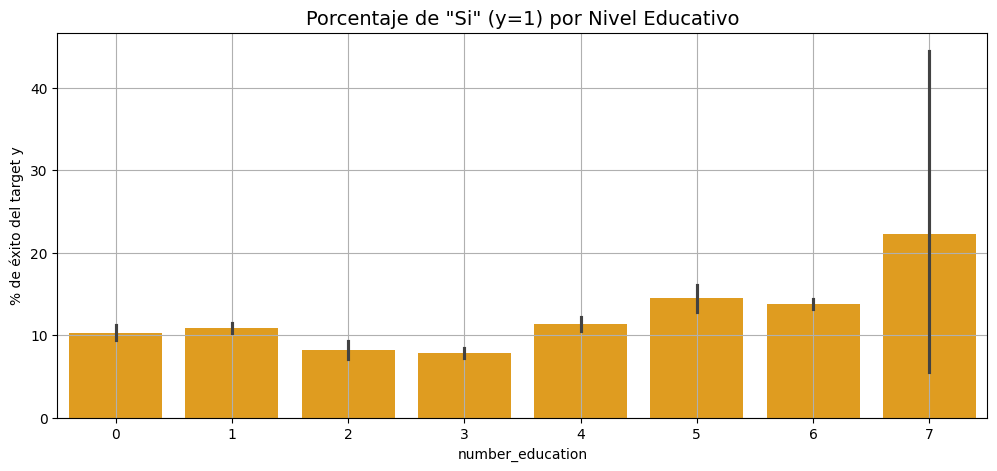

In [557]:
plt.figure(figsize=(12,5))
sns.barplot(data=df_obj_num , x='number_education', y='y', estimator=lambda x: 100 * x.mean(),color='orange')
plt.title('Porcentaje de "Si" (y=1) por Nivel Educativo', fontsize=14)
plt.ylabel('% de éxito del target y')
plt.xticks(rotation=0)
plt.grid()
plt.show()

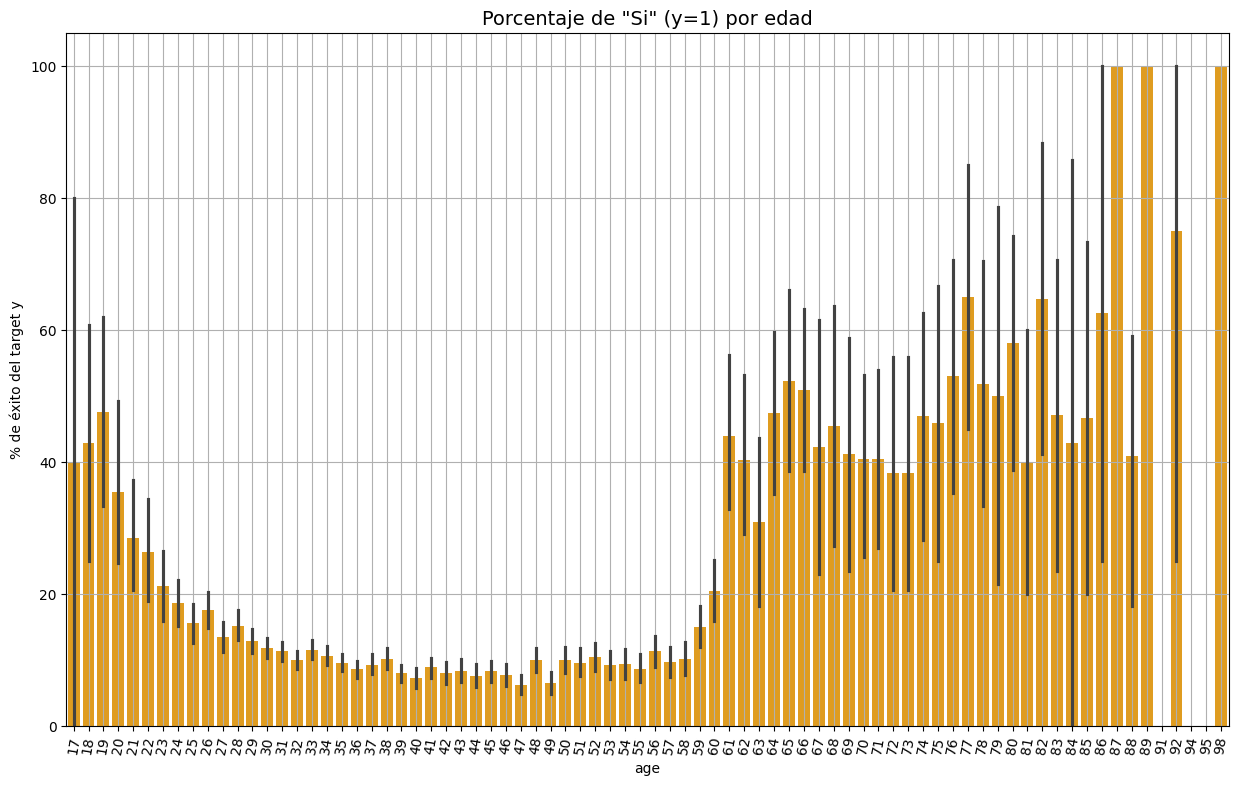

In [558]:
plt.figure(figsize=(15,9))
sns.barplot(data=df_obj_num , x='age', y='y', estimator=lambda x: 100 * x.mean(),color='orange')
plt.title('Porcentaje de "Si" (y=1) por edad', fontsize=14)
plt.ylabel('% de éxito del target y')
plt.grid()
plt.xticks(rotation=80)
plt.show()

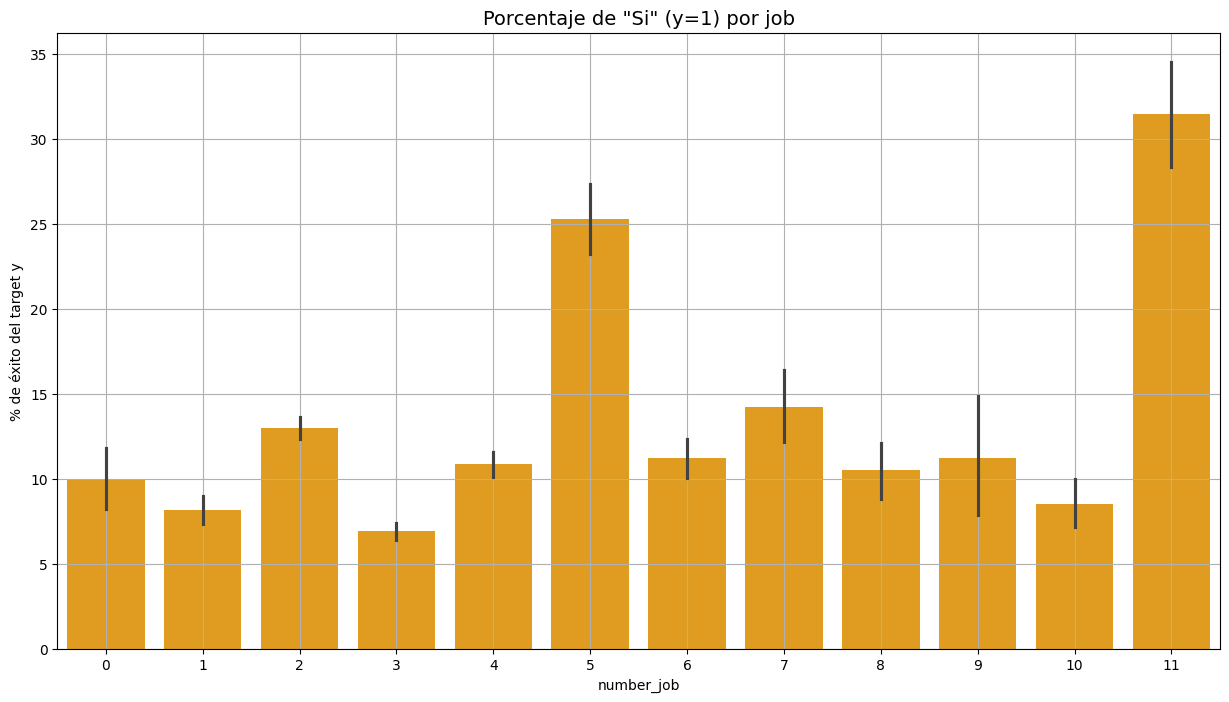

In [559]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_obj_num , x='number_job', y='y', estimator=lambda x: 100 * x.mean(),color='orange')
plt.title('Porcentaje de "Si" (y=1) por job', fontsize=14)
plt.ylabel('% de éxito del target y')
plt.grid()
plt.show()

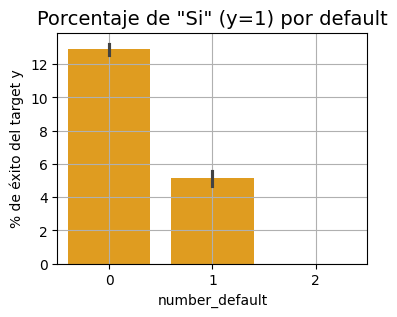

In [560]:
plt.figure(figsize=(4,3))
sns.barplot(data=df_obj_num , x='number_default', y='y', estimator=lambda x: 100 * x.mean(),color='orange')
plt.title('Porcentaje de "Si" (y=1) por default', fontsize=14)
plt.ylabel('% de éxito del target y')
plt.grid()
plt.show()

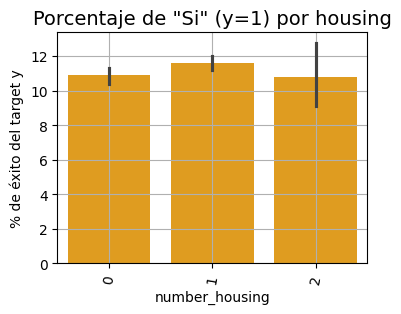

In [561]:
plt.figure(figsize=(4,3))
sns.barplot(data=df_obj_num , x='number_housing', y='y', estimator=lambda x: 100 * x.mean(),color='orange')
plt.title('Porcentaje de "Si" (y=1) por housing', fontsize=14)
plt.ylabel('% de éxito del target y')
plt.grid()
plt.xticks(rotation=80)
plt.show()



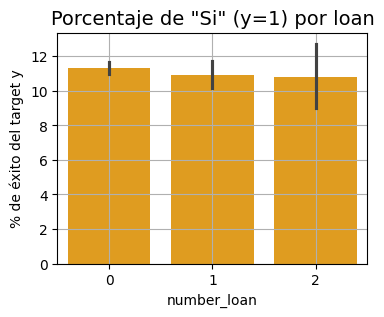

In [562]:
plt.figure(figsize=(4,3))
sns.barplot(data=df_obj_num , x='number_loan', y='y', estimator=lambda x: 100 * x.mean(),color='orange')
plt.title('Porcentaje de "Si" (y=1) por loan', fontsize=14)
plt.ylabel('% de éxito del target y')
plt.grid()
plt.show()


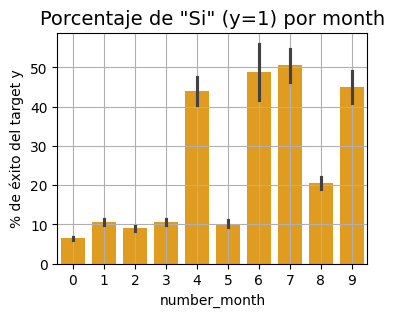

In [563]:
plt.figure(figsize=(4,3))
sns.barplot(data=df_obj_num , x='number_month', y='y', estimator=lambda x: 100 * x.mean(),color='orange')
plt.title('Porcentaje de "Si" (y=1) por month', fontsize=14)
plt.ylabel('% de éxito del target y')
plt.grid()
plt.show()

### Correlacion de nuestras variables restantes con nuestro target

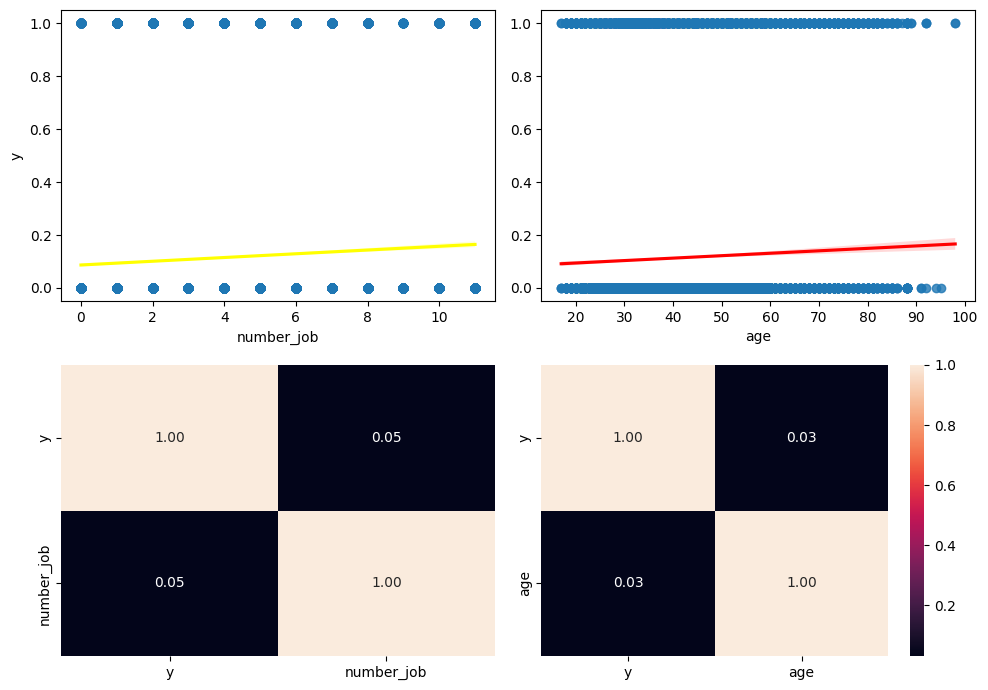

In [564]:
# Generamos las correlaciones
corr_y_job = df_obj_num [["y", "number_job"]].corr()
corr_y_age = df_obj_num [["y", "age"]].corr()
fig, axis = plt.subplots(2, 2, figsize=(10, 7))
sns.regplot(ax=axis[0, 0], data=df_obj_num , x="number_job", y="y", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_y_job, annot=True, fmt=".2f", cbar=False)
sns.regplot(ax=axis[0, 1], data=df_obj_num , x="age", y="y", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_y_age, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

In [3]:
corr_y_loan = df[["y", "number_loan"]].corr()
corr_y_cons_conf_idx = df [["y", "cons.conf.idx"]].corr()
fig, axis = plt.subplots(2, 2, figsize=(10, 7))
sns.regplot(ax=axis[0, 0], data=df , x="number_loan", y="y", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_y_loan, annot=True, fmt=".2f", cbar=False)
sns.regplot(ax=axis[0, 1], data=df , x="cons.conf.idx", y="y", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_y_cons_conf_idx, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

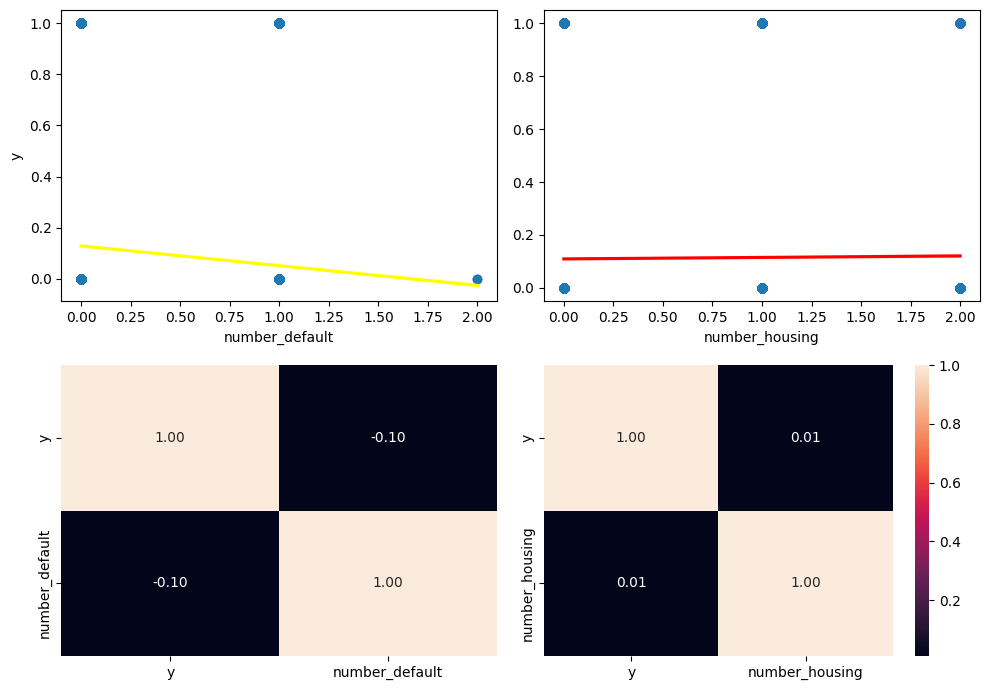

In [ ]:
corr_y_default = df[["y", "number_default"]].corr()
corr_y_housing = df[["y", "number_housing"]].corr()

fig, axis = plt.subplots(2, 2, figsize=(10, 7))
sns.regplot(ax=axis[0, 0], data=df, x="number_default", y="y", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_y_default, annot=True, fmt=".2f", cbar=False)
sns.regplot(ax=axis[0, 1], data=df, x="number_housing", y="y", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_y_housing, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

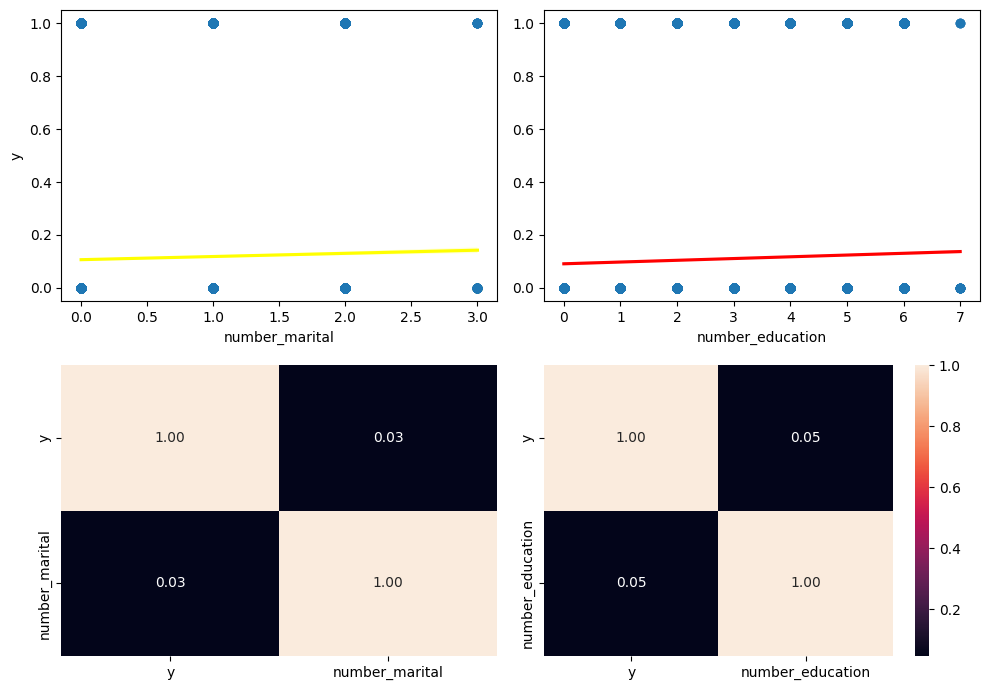

In [ ]:
corr_y_marital = df[["y", "number_marital"]].corr()
corr_y_education = df[["y", "number_education"]].corr()
fig, axis = plt.subplots(2, 2, figsize=(10, 7))
sns.regplot(ax=axis[0, 0], data=df, x="number_marital", y="y", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_y_marital, annot=True, fmt=".2f", cbar=False)
sns.regplot(ax=axis[0, 1], data=df, x="number_education", y="y", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_y_education, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

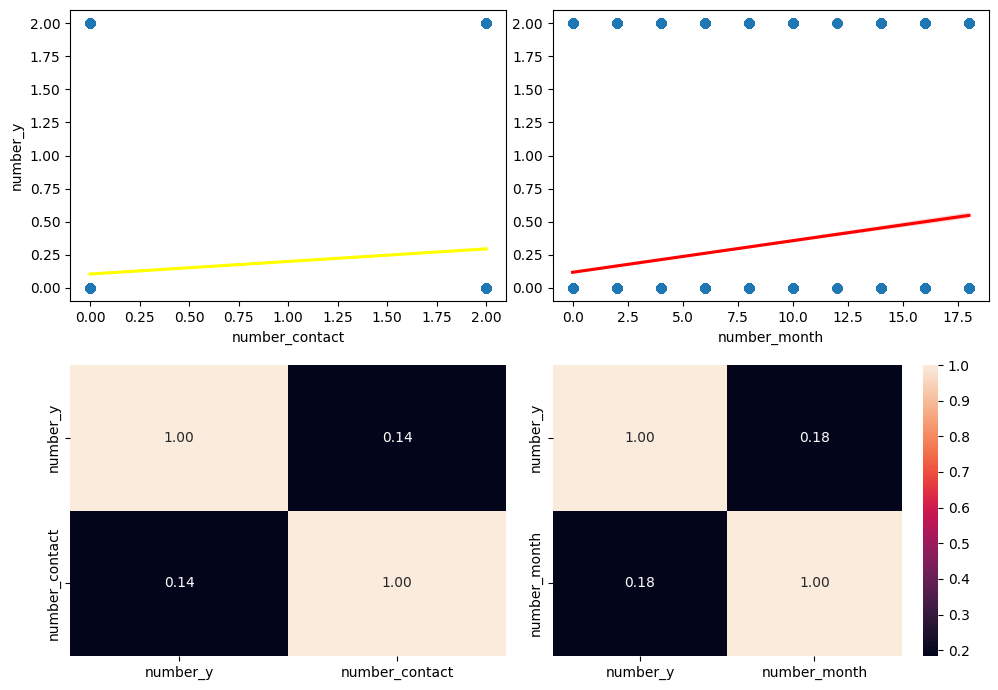

In [ ]:
corr_y_contact = df_obj_num [["number_y", "number_contact"]].corr()
corr_y_month = df_obj_num [["number_y", "number_month"]].corr()
fig, axis = plt.subplots(2, 2, figsize=(10, 7))
sns.regplot(ax=axis[0, 0], data=df_obj_num , x="number_contact", y="number_y", line_kws={'color': 'yellow'})
sns.heatmap(ax=axis[1, 0], data=corr_y_contact, annot=True, fmt=".2f", cbar=False)
sns.regplot(ax=axis[0, 1], data=df_obj_num , x="number_month", y="number_y", line_kws={'color': 'red'}).set(ylabel=None)
sns.heatmap(ax=axis[1, 1], data=corr_y_month, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

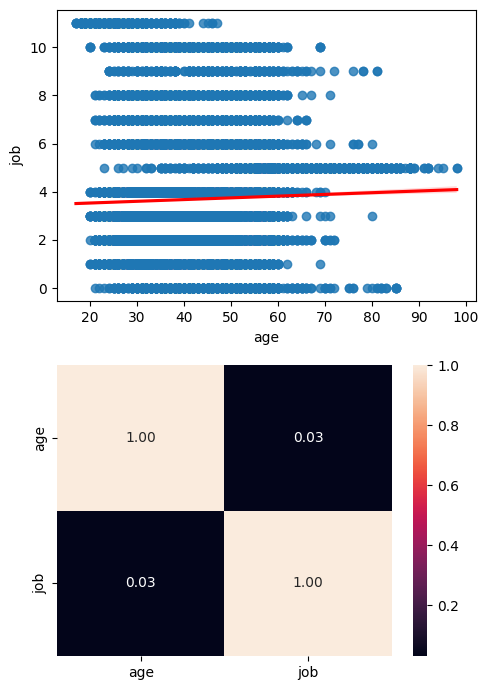

In [ ]:
corr_var = df[["age","job"]].corr()
fig, axis = plt.subplots(2, 1, figsize=(5, 7))
sns.regplot(ax=axis[0], data=df, x="age", y="job", line_kws={'color': 'red'})
sns.heatmap(ax=axis[1], data=corr_var, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

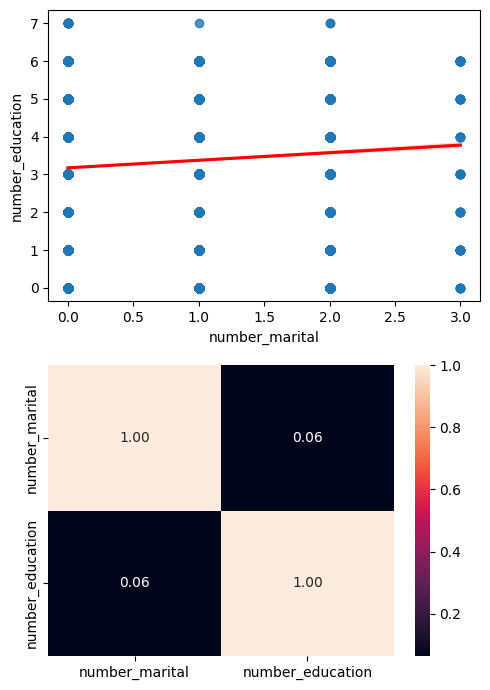

In [ ]:
corr_var = df[["number_marital","number_education"]].corr()
fig, axis = plt.subplots(2, 1, figsize=(5, 7))
sns.regplot(ax=axis[0], data=df, x="number_marital", y="number_education", line_kws={'color': 'red'})
sns.heatmap(ax=axis[1], data=corr_var, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

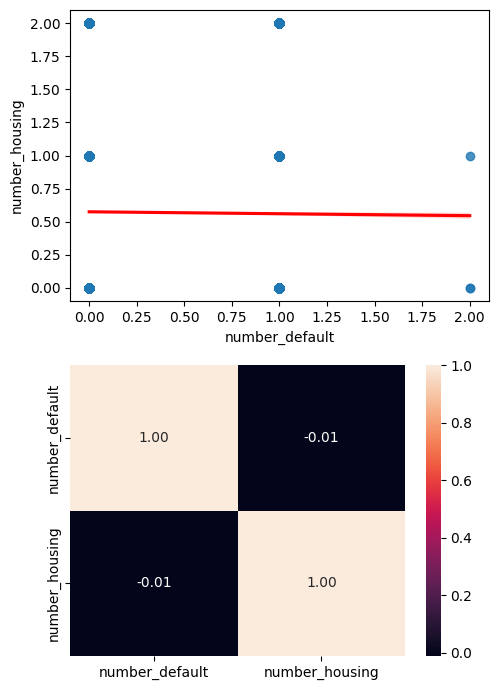

In [ ]:
corr_var = df[["number_default", "number_housing"]].corr()
fig, axis = plt.subplots(2, 1, figsize=(5, 7))
sns.regplot(ax=axis[0], data=df, x="number_default", y="number_housing", line_kws={'color': 'red'})
sns.heatmap(ax=axis[1], data=corr_var, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

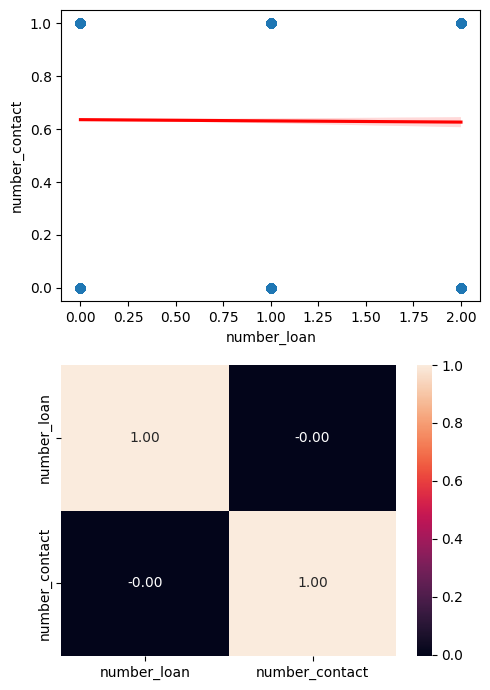

In [ ]:
corr_var = df[["number_loan", "number_contact",]].corr()
fig, axis = plt.subplots(2, 1, figsize=(5, 7))
sns.regplot(ax=axis[0], data=df, x="number_loan", y="number_contact", line_kws={'color': 'red'})
sns.heatmap(ax=axis[1], data=corr_var, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

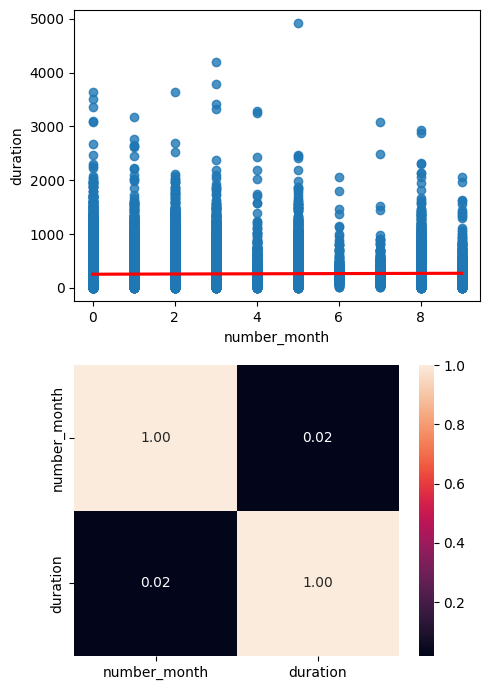

In [ ]:
corr_var = df[["number_month", "duration"]].corr()
fig, axis = plt.subplots(2, 1, figsize=(5, 7))
sns.regplot(ax=axis[0], data=df, x="number_month", y="duration", line_kws={'color': 'red'})
sns.heatmap(ax=axis[1], data=corr_var, annot=True, fmt=".2f")
plt.tight_layout()
plt.show()

age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week

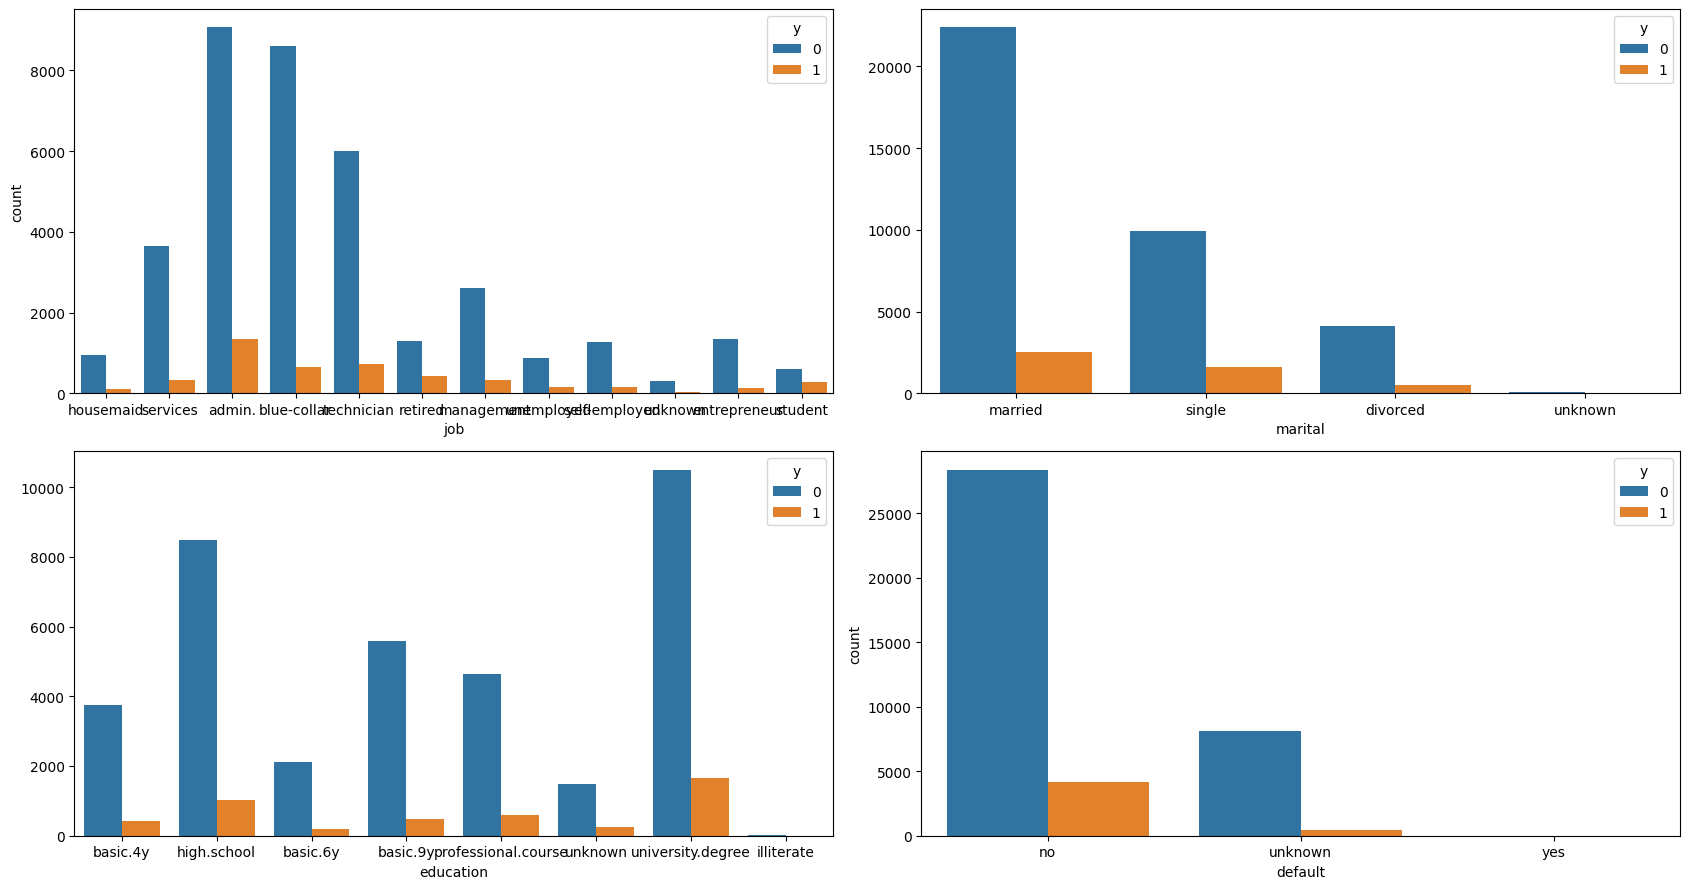

In [566]:
fig, axis = plt.subplots(2, 2, figsize=(17, 9))
sns.countplot(ax=axis[0, 0], data=df, x="job", hue="y")
sns.countplot(ax=axis[0, 1], data=df, x="marital", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=df, x="education", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 1], data=df, x="default", hue="y")
plt.tight_layout()
plt.show()

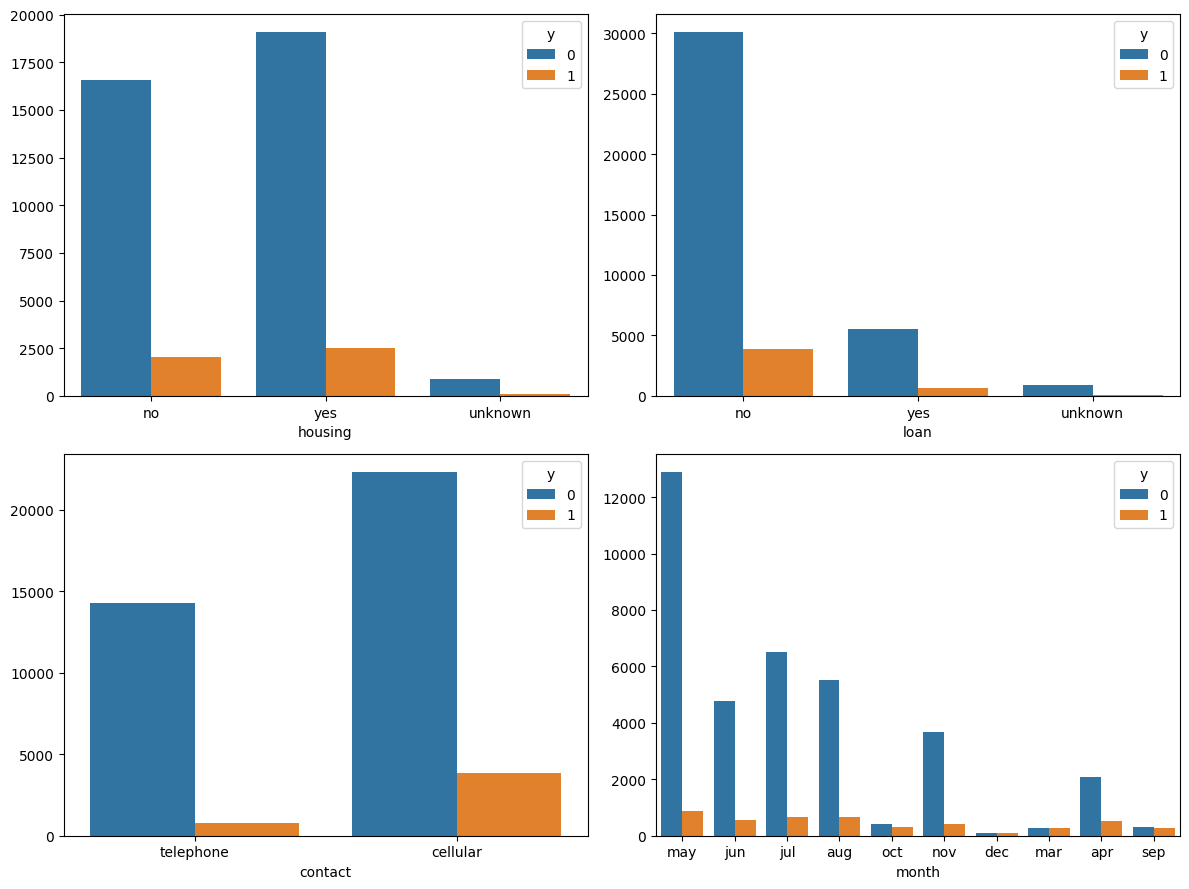

In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(12, 9))
sns.countplot(ax=axis[0, 0], data=df, x="housing", hue="y").set(ylabel=None)
sns.countplot(ax=axis[0, 1], data=df, x="loan", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 0], data=df, x="contact", hue="y").set(ylabel=None)
sns.countplot(ax=axis[1, 1], data=df, x="month", hue="y").set(ylabel=None)
plt.tight_layout()
plt.show()

### Observaciones

## Paso 6: Ingeniería de características

#### Análisis de outliers

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
job,41176.0,3.673863,2.454340,0.000,2.000,3.000,4.000,11.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
y,41176.0,0.112663,0.316184,0.000,0.000,0.000,0.000,1.000
number_marital,41176.0,0.510637,0.696794,0.000,0.000,0.000,1.000,3.000
number_education,41176.0,3.277370,2.185558,0.000,1.000,3.000,6.000,7.000
number_default,41176.0,0.208908,0.406713,0.000,0.000,0.000,0.000,2.000


**Outliers: Visualización**


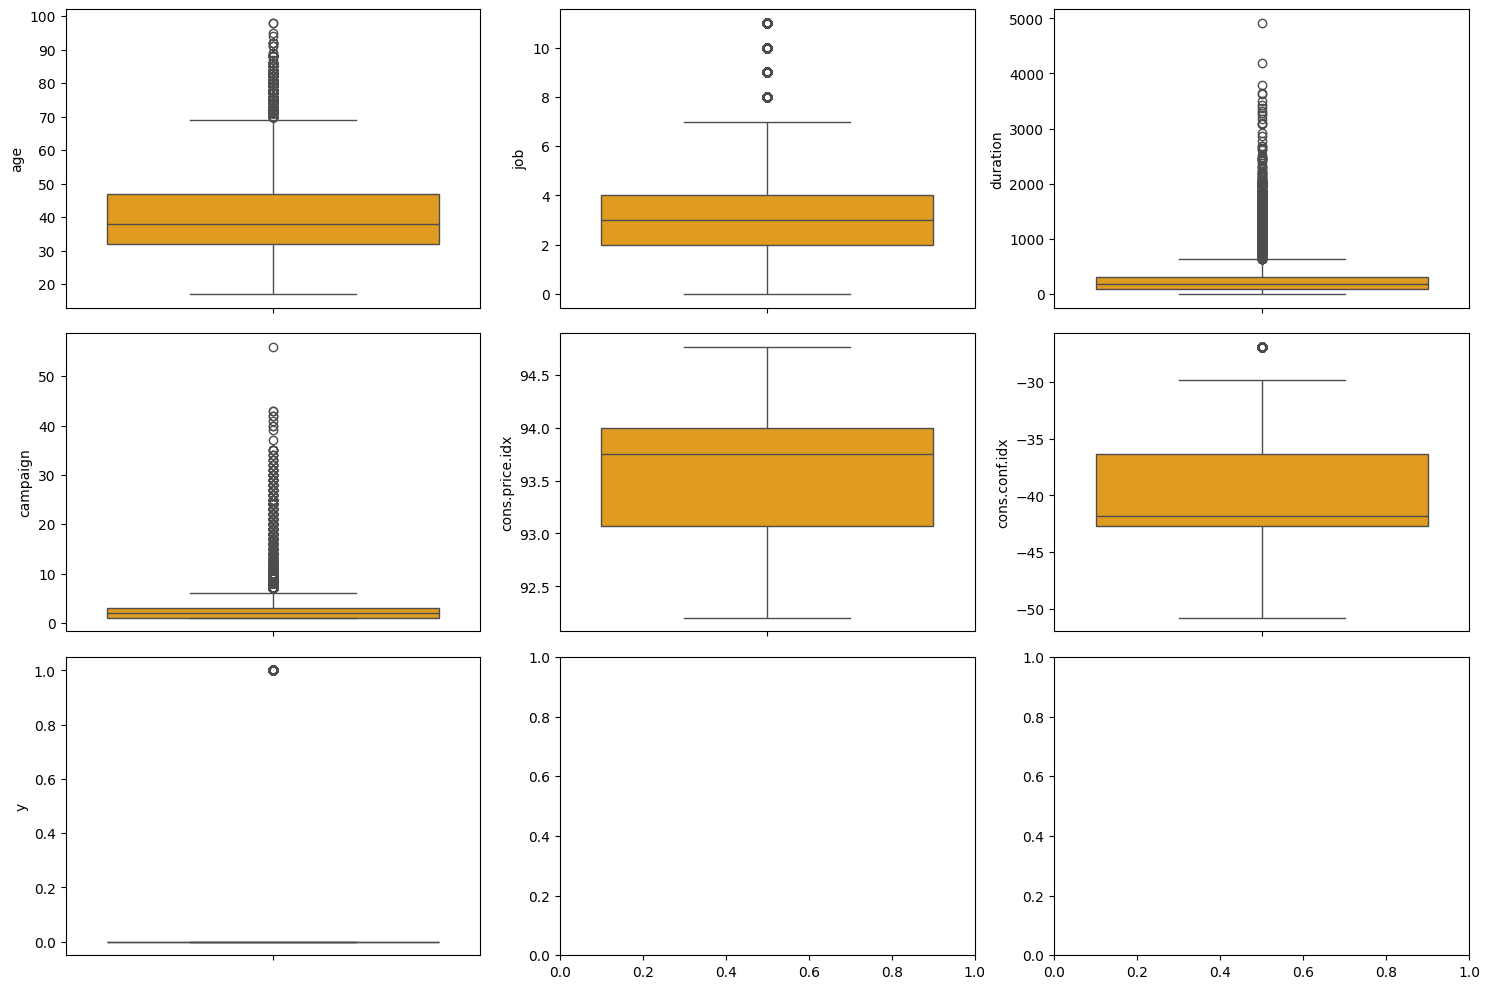

In [ ]:
fig, axis = plt.subplots(3,3, figsize=(15, 10))
sns.boxplot(ax=axis[0, 0], color="orange", data=df, y="age")
sns.boxplot(ax=axis[0, 1], color="orange", data=df, y="job")
sns.boxplot(ax=axis[0, 2], color="orange", data=df, y="duration")
sns.boxplot(ax=axis[1, 0], color="orange", data=df, y="campaign")
sns.boxplot(ax=axis[1, 1], color="orange", data=df, y="cons.price.idx")
sns.boxplot(ax=axis[1, 2], color="orange", data=df, y="cons.conf.idx")
sns.boxplot(ax=axis[2, 0], color="orange", data=df, y="y")
plt.tight_layout()
plt.show()

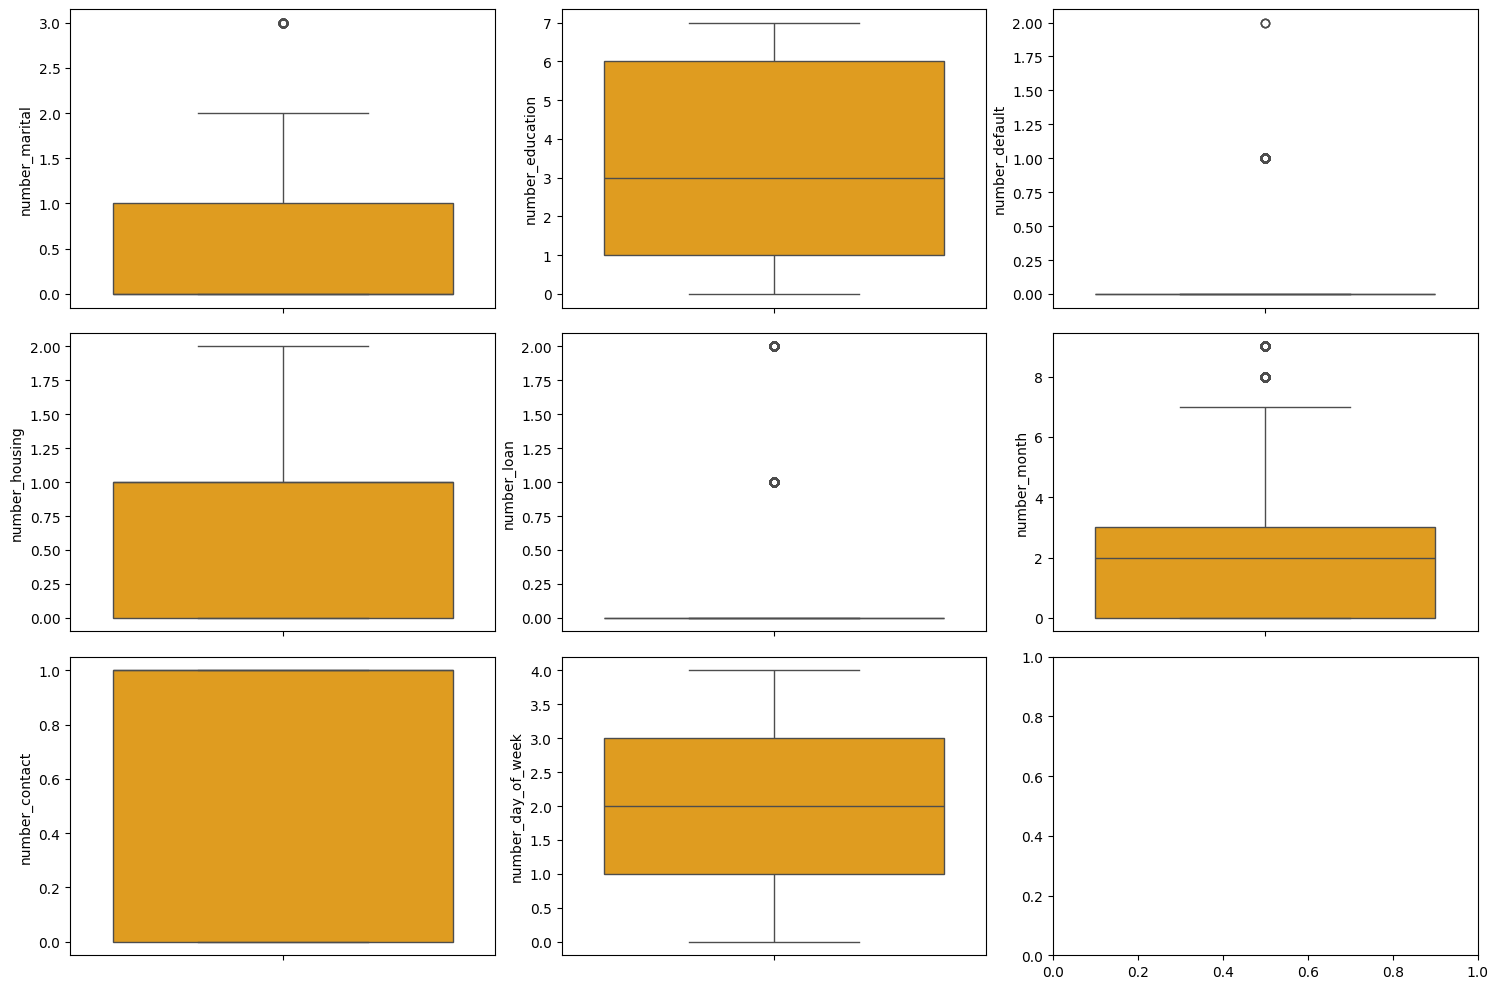

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], color="orange", data=df, y="number_marital")
sns.boxplot(ax=axis[0, 1], color="orange", data=df, y="number_education")
sns.boxplot(ax=axis[0, 2], color="orange", data=df, y="number_default")
sns.boxplot(ax=axis[1, 0], color="orange", data=df, y="number_housing")
sns.boxplot(ax=axis[1, 1], color="orange", data=df, y="number_loan")
sns.boxplot(ax=axis[1, 2], color="orange", data=df, y="number_month")
sns.boxplot(ax=axis[2, 0], color="orange", data=df, y="number_contact")
sns.boxplot(ax=axis[2, 1], color="orange", data=df, y="number_day_of_week")
plt.tight_layout()
plt.show()

> #### Observaciones
>
> Podemos determinar fácilmente que las variables afectadas por outliers son `age`, `job`, `campaign`, `duration`, `cons.conf.idx`, `number_default`, `number_marital`, `number_loan` y `number_month`. 

Por ejemplo, si queremos aplicar el segundo punto de los anteriores para el caso de la columna `age`:


In [ ]:
age_stats = df["age"].describe()
age_stats

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [ ]:
job_stats = df["job"].describe()
job_stats

count    41176.000000
mean         3.673863
std          2.454340
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: job, dtype: float64

In [ ]:
q1 = df["job"].quantile(0.25)
q3 = df["job"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 7.0, límite inferior: 0, rango intercuartílico: 2.0'

In [ ]:
df[df["job"] > 7]

,age,job,marital,education,default,housing,loan,contact,month,duration,...,cons.conf.idx,y,number_marital,number_education,number_default,number_housing,number_loan,number_month,number_contact,number_day_of_week
27,39,8,married,basic.9y,unknown,no,no,telephone,may,233,...,-36.4,0,0,3,1,0,0,0,0,0
29,55,9,married,university.degree,unknown,unknown,unknown,telephone,may,362,...,-36.4,0,0,6,1,2,2,0,0,0
35,55,9,married,basic.4y,unknown,yes,no,telephone,may,336,...,-36.4,0,0,0,1,1,0,0,0,0
41,32,10,married,high.school,no,yes,no,telephone,may,314,...,-36.4,0,0,1,0,1,0,0,0,0
60,47,10,married,university.degree,unknown,no,no,telephone,may,449,...,-36.4,0,0,6,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41133,28,8,single,university.degree,no,yes,no,cellular,nov,97,...,-50.8,0,1,6,0,1,0,5,1,3
41134,25,11,single,high.school,no,no,no,cellular,nov,244,...,-50.8,1,1,1,0,0,0,5,1,3
41168,38,10,married,university.degree,no,no,no,cellular,nov,144,...,-50.8,0,0,6,0,0,0,5,1,2
41171,33,11,married,professional.course,no,yes,no,telephone,nov,112,...,-50.8,1,0,4,0,1,0,5,0,3


In [ ]:
cantidad_1 = ((df['job'] >7) & (df['y'] == 1)).sum()
cantidad_1

np.int64(585)

In [ ]:
# Calculo el Rango inter Cuartil: IQR = Q3(75%) - Q1(25%)
q1 = df["age"].quantile(0.25)
q3 = df["age"].quantile(0.75)
iqr = q3 - q1

# Definir los límites inferior y superior
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 69.5, límite inferior: 9.5, rango intercuartílico: 15.0'

> #### Conclusión
>
> Basándonos en estos resultados, deberíamos eliminar los registros de los clientes cuya edad supere los 69 años. Sin embargo, nuestro criterio es muy importante aquí y, según las edades que vimos en el diagrama de caja, los valores más altos están por encima de 80. Veamos cuántos valores representan ese valor por encima de 80:

In [ ]:
df[df["age"] > 80]

,age,job,marital,education,default,housing,loan,contact,month,duration,...,cons.conf.idx,y,number_marital,number_education,number_default,number_housing,number_loan,number_month,number_contact,number_day_of_week
27800,88,5,divorced,basic.4y,no,yes,no,cellular,mar,48,...,-50.0,0,2,0,0,1,0,7,1,2
27802,88,5,divorced,basic.4y,no,no,no,cellular,mar,266,...,-50.0,1,2,0,0,0,0,7,1,2
27805,88,5,divorced,basic.4y,no,yes,yes,cellular,mar,796,...,-50.0,1,2,0,0,1,1,7,1,2
27808,88,5,divorced,basic.4y,no,yes,no,cellular,mar,96,...,-50.0,0,2,0,0,1,0,7,1,2
27810,88,5,divorced,basic.4y,no,yes,no,cellular,mar,126,...,-50.0,1,2,0,0,1,0,7,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40950,81,5,divorced,basic.4y,no,yes,no,cellular,oct,192,...,-49.5,0,2,0,0,1,0,4,1,3
40965,81,5,divorced,basic.4y,no,yes,no,cellular,oct,158,...,-49.5,0,2,0,0,1,0,4,1,3
40969,84,5,divorced,basic.4y,unknown,yes,no,cellular,oct,106,...,-49.5,0,2,0,1,1,0,4,1,4
40986,84,5,divorced,basic.4y,unknown,yes,yes,cellular,oct,138,...,-49.5,0,2,0,1,1,1,4,1,0


In [ ]:
cantidad_1 = ((df['age'] > 80) & (df['y'] == 1)).sum()
cantidad_1

np.int64(59)

In [ ]:
cantidad_1 = ((df['age'] > 90) & (df['y'] == 1)).sum()
cantidad_1

np.int64(5)

In [ ]:
cantidad_0 = ((df['age'] > 80) & (df['y'] == 0)).sum()
cantidad_0

np.int64(60)

> #### Observaciones
>
> Podemos observar que, al analizar mas a fondo nuestra variable edad, las personas por encima de 80 años tienden a contratar depositos a largo plazo, en este caso tenemos un total de 59 personas que contrataron, contra 60 personas que decidieron que no.
>
> Si aumentamos el limite de edad a 85 se reduce a mas de la mitad de las personas que contrataron un deposito a largo plazo, y si subimos a 90 años este se reduce drasticamente a solo 5 personas,
> #### Conclusiones
>
> Los adultos mayores podrian contratar mas depositos para asi generar algun beneficio para sus familiares.
>
> Por lo observado decidimos que **mantenemos los valores atípicos**.

In [ ]:
cantidad_1 = ((df['age'] >= 28) & (df['y'] == 1)).sum()
cantidad_1

np.int64(4054)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'duration', 'campaign', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'y', 'number_marital',
       'number_education', 'number_default', 'number_housing', 'number_loan',
       'number_month', 'number_contact', 'number_day_of_week'],
      dtype='object')

# EXTENDER 

- number_y/job complatible
- duration/job no complatible

<Axes: title={'center': 'Distribución de la variable objetivo (y)'}, xlabel='y'>

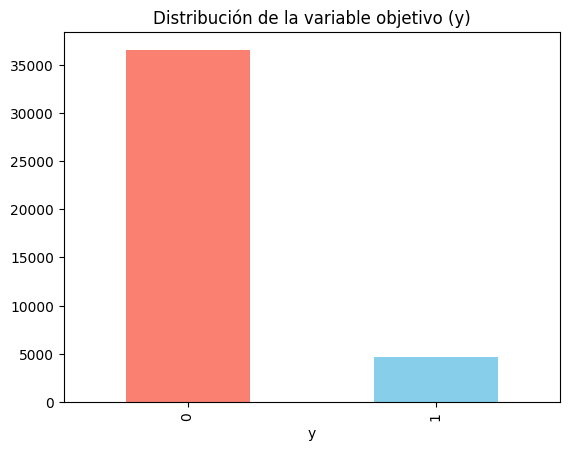

In [ ]:
df['y'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'], title='Distribución de la variable objetivo (y)')

<Axes: xlabel='y', ylabel='age'>

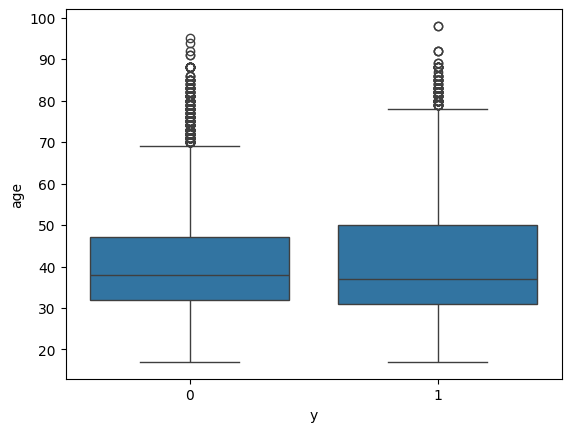

In [ ]:
sns.boxplot(x='y', y='age', data=df)

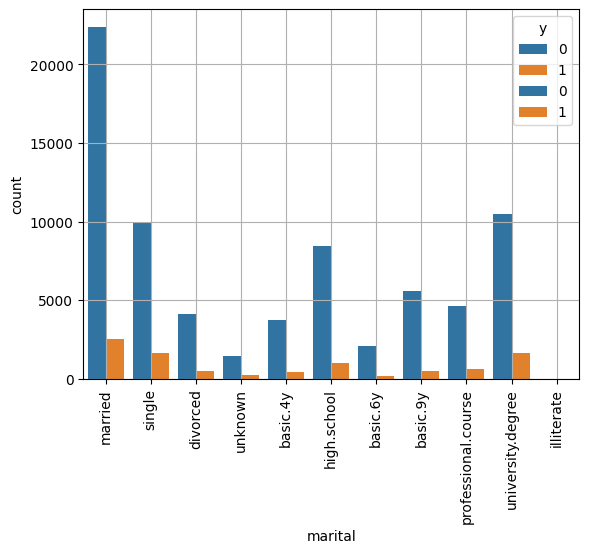

In [ ]:
sns.countplot(x='marital', hue='y', data=df)
sns.countplot(x='education', hue='y', data=df)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()